Loading the data from Kaggle

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of .json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#API to fetch the dataset from the kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 94% 154M/163M [00:01<00:00, 135MB/s]
100% 163M/163M [00:01<00:00, 118MB/s]


Data Pre-processing

In [ ]:
# extract the compressed dataset
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
 zip.extractall()
print("zipped datafile is extracted")

zipped datafile is extracted


In [ ]:
#list all the data avialable
!ls


data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_301.jpg', 'with_mask_1502.jpg', 'with_mask_1726.jpg', 'with_mask_1391.jpg', 'with_mask_1240.jpg']
['with_mask_2865.jpg', 'with_mask_1624.jpg', 'with_mask_702.jpg', 'with_mask_1947.jpg', 'with_mask_1007.jpg']


In [ ]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1754.jpg', 'without_mask_3105.jpg', 'without_mask_618.jpg', 'without_mask_1066.jpg', 'without_mask_1992.jpg']
['without_mask_1698.jpg', 'without_mask_2968.jpg', 'without_mask_572.jpg', 'without_mask_2264.jpg', 'without_mask_2255.jpg']


In [ ]:
print('number of with mask images:',len(with_mask_files))
print('number of WithOut mask images:',len(without_mask_files))

number of with mask images: 3725
number of WithOut mask images: 3828


In [ ]:
#import necessary library
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split



#Creating Labels for the two class of images

In [ ]:
#Creates the label
with_mask_labels=[1]*3725

without_mask_labels=[0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels=with_mask_labels+without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images

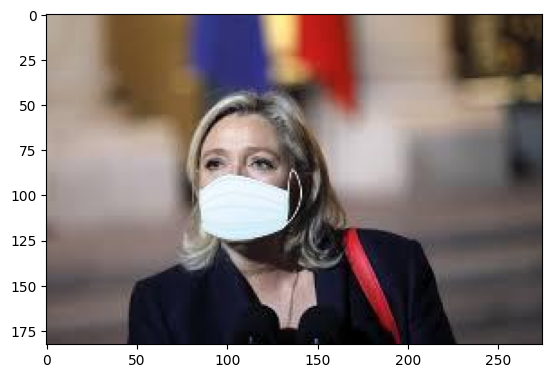

In [ ]:
# With Mask Image
img = mpimg.imread('/content/data/with_mask/with_mask_1624.jpg')
imgplot=plt.imshow(img)
plt.show()

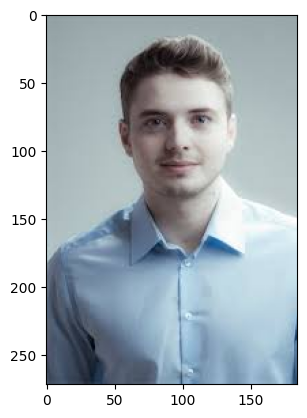

In [ ]:
# Without Maks Image
img = mpimg.imread('/content/data/without_mask/without_mask_2255.jpg')
imgplot=plt.imshow(img)
plt.show()

# Image processing

## Convert the images in to NumPy Array

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[45, 46, 51],
        [45, 46, 51],
        [45, 46, 51],
        ...,
        [59, 63, 75],
        [52, 56, 67],
        [44, 47, 56]],

       [[45, 46, 51],
        [45, 46, 51],
        [44, 45, 50],
        ...,
        [59, 62, 74],
        [55, 58, 67],
        [48, 51, 60]],

       [[43, 44, 49],
        [43, 44, 49],
        [43, 44, 49],
        ...,
        [47, 49, 61],
        [47, 50, 58],
        [43, 46, 55]],

       ...,

       [[84, 68, 49],
        [87, 68, 51],
        [94, 71, 57],
        ...,
        [82, 85, 92],
        [83, 86, 93],
        [85, 88, 95]],

       [[82, 66, 49],
        [87, 68, 53],
        [93, 70, 56],
        ...,
        [82, 85, 92],
        [82, 85, 92],
        [83, 86, 93]],

       [[82, 65, 49],
        [87, 68, 53],
        [92, 69, 55],
        ...,
        [81, 84, 91],
        [81, 84, 91],
        [82, 85, 92]]], dtype=uint8)
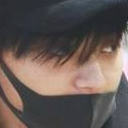

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
X=np.array(data)
Y=np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


#Train and Split the data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape, X_train.shape,X_test.shape)
print(Y.shape, Y_train.shape,Y_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)
(7553,) (6042,) (1511,)


In [ ]:
#Scaling the data
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
X_test_scaled[3]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

#Building a convolution Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

****Architecture Of Convolution Neural Network****

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
#compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
#Training the Neural Network
history=model.fit(X_train_scaled,Y_train,validation_split=0.5,epochs=5)

Epoch 1/5
95/95 [==============================] - 101s 1s/step - loss: 0.5850 - acc: 0.7306 - val_loss: 0.3139 - val_acc: 0.8699
Epoch 2/5
95/95 [==============================] - 93s 983ms/step - loss: 0.3472 - acc: 0.8679 - val_loss: 0.2725 - val_acc: 0.8871
Epoch 3/5
95/95 [==============================] - 92s 969ms/step - loss: 0.2876 - acc: 0.8865 - val_loss: 0.2791 - val_acc: 0.8742
Epoch 4/5
95/95 [==============================] - 90s 951ms/step - loss: 0.2509 - acc: 0.9020 - val_loss: 0.2494 - val_acc: 0.8971
Epoch 5/5
95/95 [==============================] - 95s 1s/step - loss: 0.2099 - acc: 0.9225 - val_loss: 0.2197 - val_acc: 0.9116


#Model Evaluation

In [ ]:
loss,accuracy=model.evaluate(X_test_scaled, Y_test)
print("Test Accuracy=",accuracy)
print("Total Loss=",loss)

48/48 [==============================] - 10s 212ms/step - loss: 0.2147 - acc: 0.9133
Test Accuracy= 0.9133024215698242
Total Loss= 0.21474914252758026


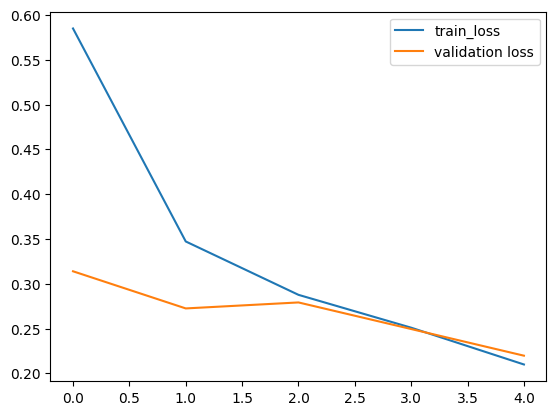

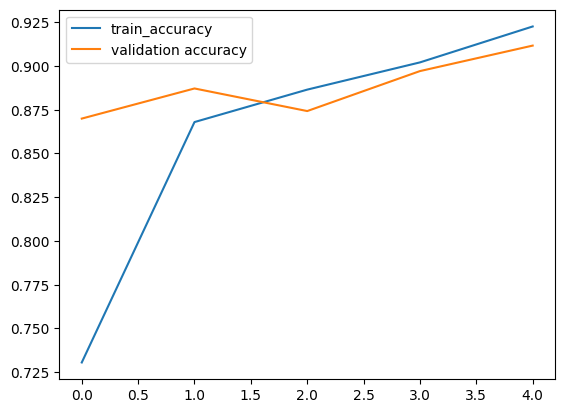

In [ ]:
h = history

#plot the loss value
plt.plot(h.history['loss'],label='train_loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()
#plot the accuracy value
plt.plot(h.history['acc'],label='train_accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()


#Prediction The image is with mask or without mask

Path of the image to be predicted:/content/Selfie.jpg


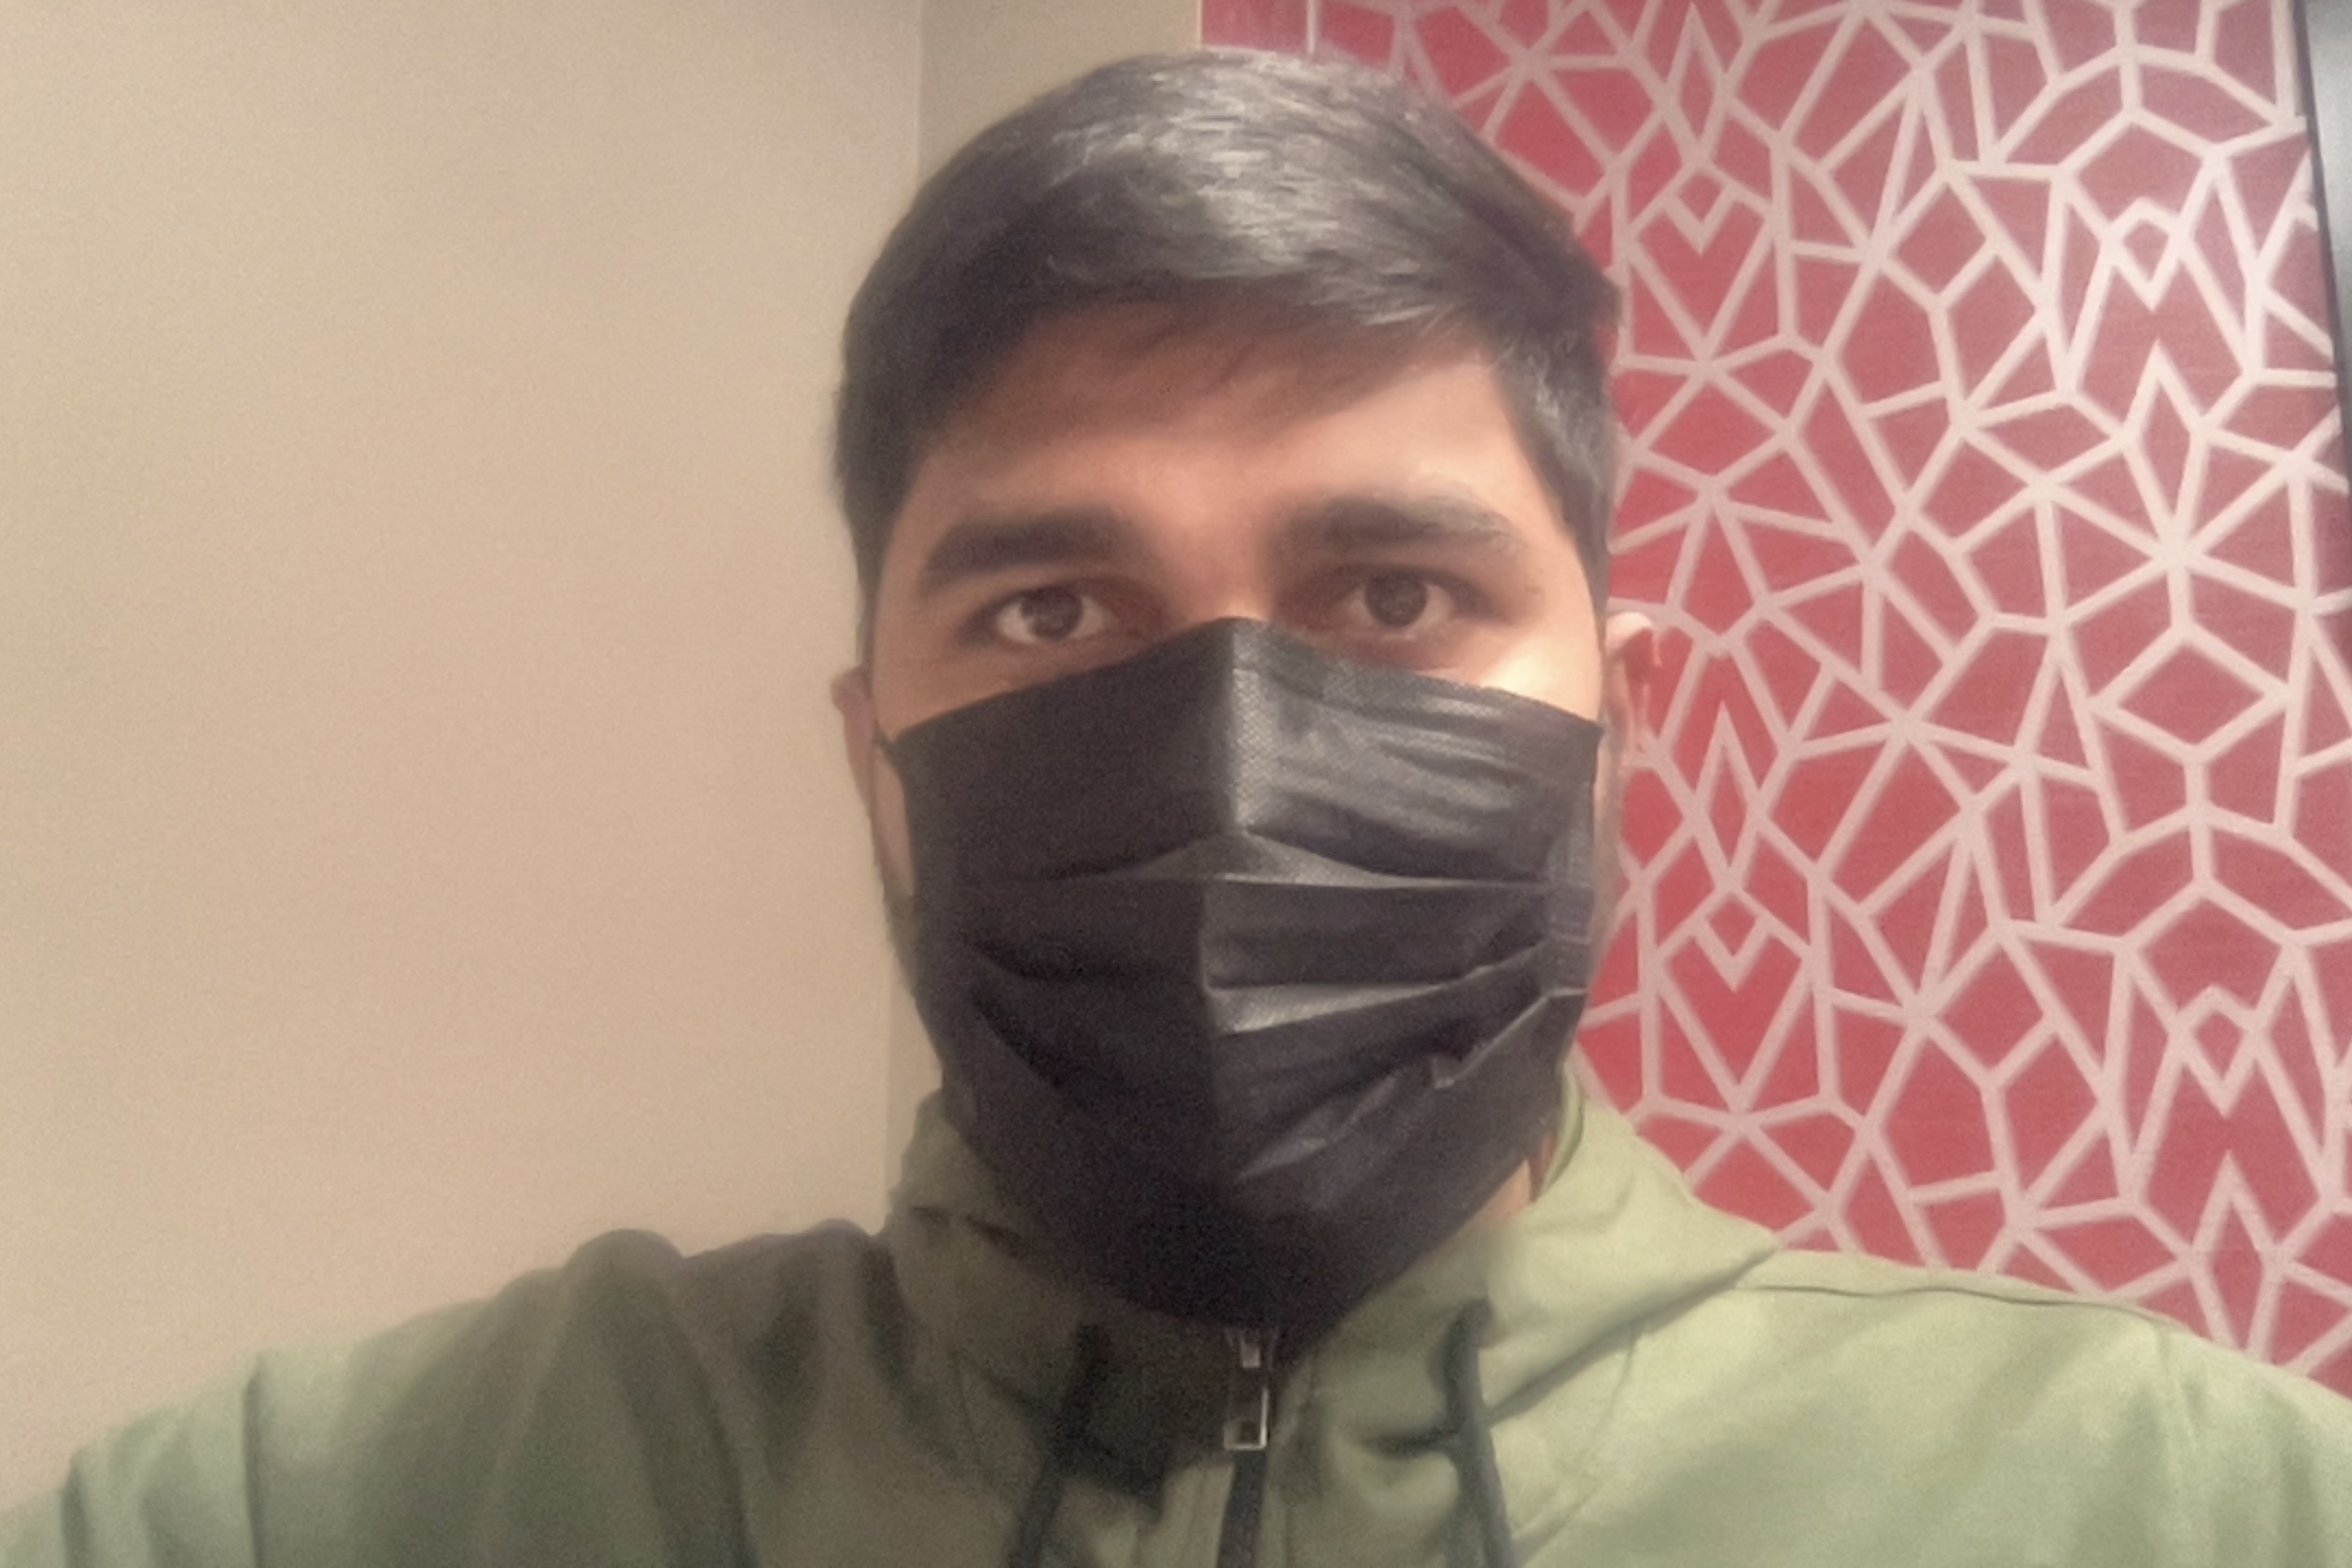

1/1 [==============================] - 0s 73ms/step
[[0.4703945 0.571789 ]]
1
the person is wearing the mask


In [ ]:
input_image_path=input("Path of the image to be predicted:")

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled=input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction=model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label=np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label==1:

  print("the person in the image wearing the mask")

else:

  print("the person in the image not wearing the mask")
